In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [14]:
movies_df = pd.read_csv('Data/movies.csv')
# Selecting features and the target variable
features = movies_df.drop(columns=['tconst', 'primaryTitle', 'originalTitle', 'averageRating'])
target = movies_df['averageRating']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Base Model

In [15]:
# Initializing and training the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Predicting on the test set
base_y_pred = dt_regressor.predict(X_test)

# Evaluating the model
base_mse = mean_squared_error(y_test, base_y_pred)
base_r2 = r2_score(y_test, base_y_pred)

base_mse, base_r2
print("Base MSE:", base_mse)
print("Base R2:", base_r2)

Base MSE: 2.457987047972108
Base R2: -0.35853912171157964


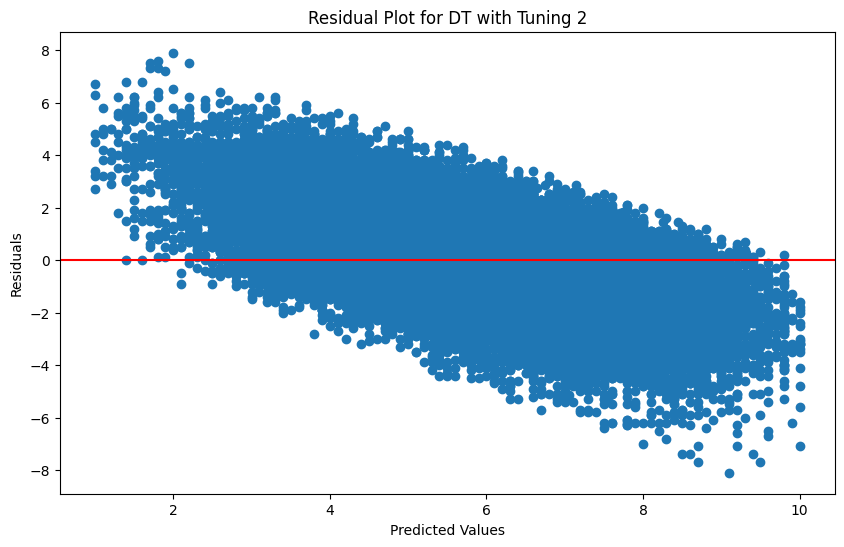

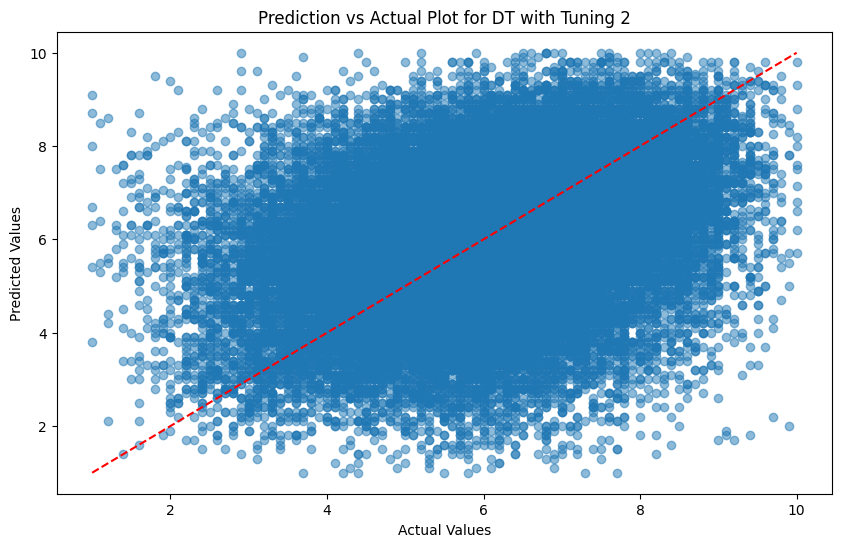

In [23]:
residuals = y_test - base_y_pred
plt.figure(figsize=(10, 6))
plt.scatter(base_y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for DT with Tuning 2')
plt.show()

# Prediction vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, base_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Plot for DT with Tuning 2')
plt.show()

### First Hyperparameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV

# Setting up Grid Search for hyperparameter tuning of the Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # exploring various depths including 'None' (no limit)
    'min_samples_split': [2, 5, 10],   # minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # minimum number of samples required at a leaf node
}

# Initializing the Grid Search with a Decision Tree Regressor
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
first_best_params = grid_search.best_params_
first_best_params

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [17]:
# Training the Decision Tree Regressor with the best parameters found
tuned_dt_regressor = DecisionTreeRegressor(
    max_depth = first_best_params['max_depth'],
    min_samples_leaf = first_best_params['min_samples_leaf'],
    min_samples_split = first_best_params['min_samples_split'],
    random_state=42
)
tuned_dt_regressor.fit(X_train, y_train)

# Predicting on the test set with the tuned model
first_tuned_y_pred = tuned_dt_regressor.predict(X_test)

# Evaluating the tuned model
first_tuned_mse = mean_squared_error(y_test, first_tuned_y_pred)
first_tuned_r2 = r2_score(y_test, first_tuned_y_pred)

first_tuned_mse, first_tuned_r2
print("First Tuned MSE:", first_tuned_mse)
print("First Tuned R2:", first_tuned_r2)

First Tuned MSE: 1.2546405069697237
First Tuned R2: 0.3065552506435497


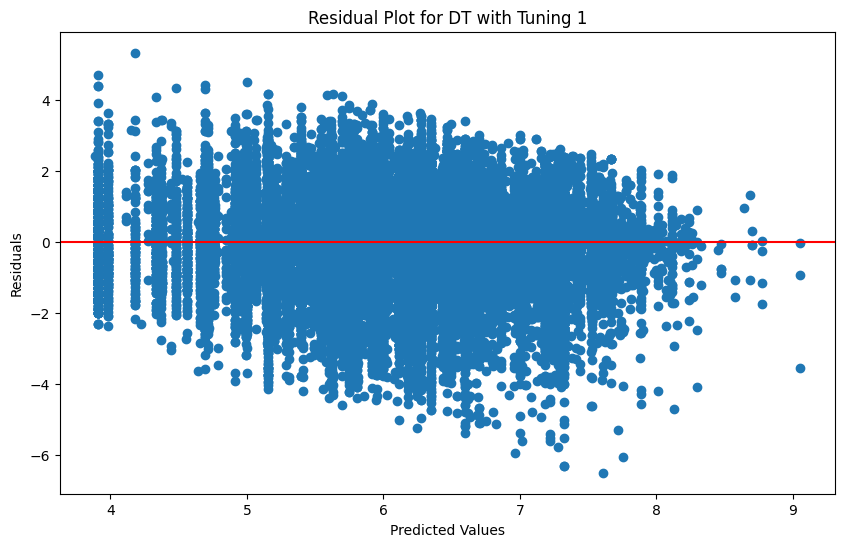

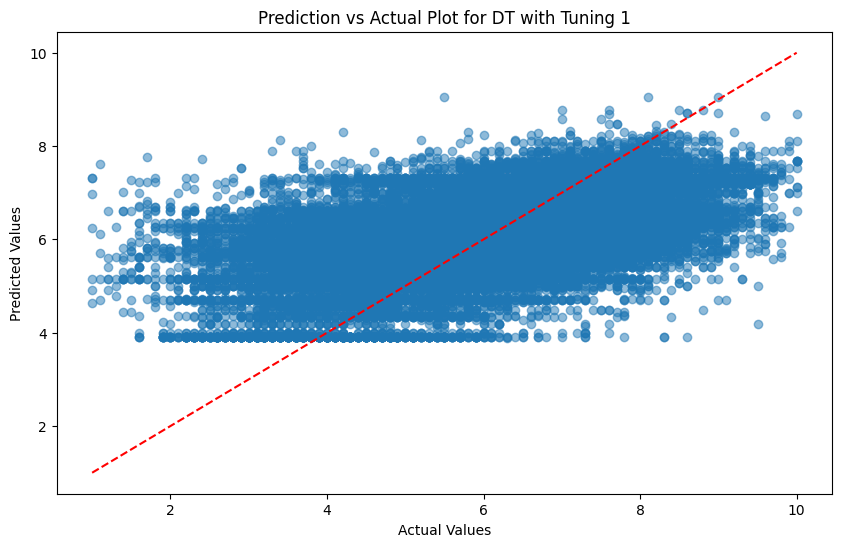

In [18]:
# Residual Plot
residuals = y_test - first_tuned_y_pred
plt.figure(figsize=(10, 6))
plt.scatter(first_tuned_y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for DT with Tuning 1')
plt.show()

# Prediction vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, first_tuned_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Plot for DT with Tuning 1')
plt.show()

### Second Hyperparameter Tuning

In [19]:
# Simplified Grid Search with reduced parameter space
simplified_param_grid = {
    'max_depth': [3, 5, 7],  # reduced depth options
    'min_samples_split': [2, 5],  # reduced split options
    'min_samples_leaf': [1, 2]    # reduced leaf options
}

# Re-initializing the Grid Search with simplified parameters
simplified_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), simplified_param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting the simplified grid search to the data
simplified_grid_search.fit(X_train, y_train)

# Best parameters from the simplified grid search
simplified_best_params = simplified_grid_search.best_params_
simplified_best_params

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [20]:
# Training the Decision Tree Regressor with the best parameters found
tuned_dt_regressor_2 = DecisionTreeRegressor(
    max_depth=simplified_best_params['max_depth'],
    min_samples_leaf=simplified_best_params['min_samples_leaf'],
    min_samples_split=simplified_best_params['min_samples_split'],
    random_state=42
)
tuned_dt_regressor_2.fit(X_train, y_train)

# Predicting on the test set with the tuned model
second_tuned_y_pred = tuned_dt_regressor_2.predict(X_test)

# Evaluating the tuned model
second_tuned_mse = mean_squared_error(y_test, second_tuned_y_pred)
second_tuned_r2 = r2_score(y_test, second_tuned_y_pred)

print("Second Tuned MSE:", second_tuned_mse)
print("Second Tuned R2:", second_tuned_r2)

Second Tuned MSE: 1.3114934170693198
Second Tuned R2: 0.2751324233275252


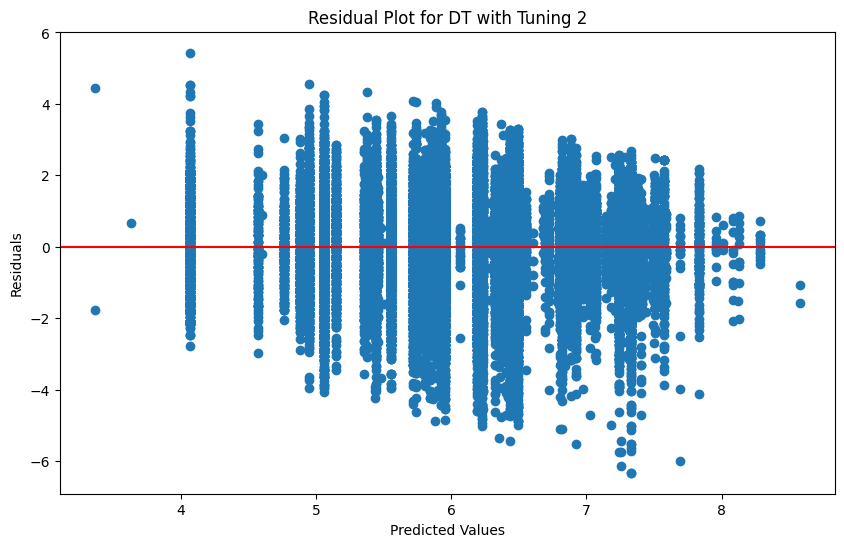

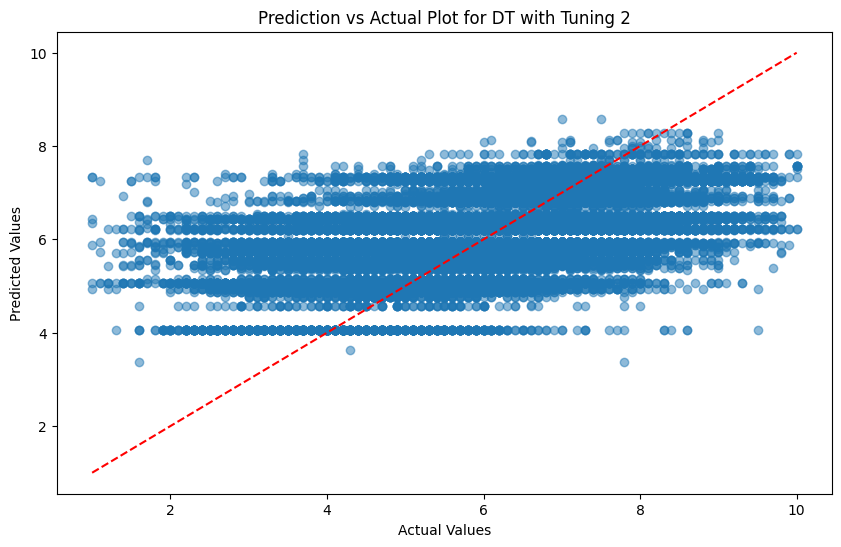

In [21]:
# Residual Plot
residuals = y_test - second_tuned_y_pred
plt.figure(figsize=(10, 6))
plt.scatter(second_tuned_y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for DT with Tuning 2')
plt.show()

# Prediction vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, second_tuned_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Plot for DT with Tuning 2')
plt.show()

### One More Attempt


{'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 2}
Final Tuned MSE: 1.2461817878491048
Final Tuned R2: 0.31123041801451334


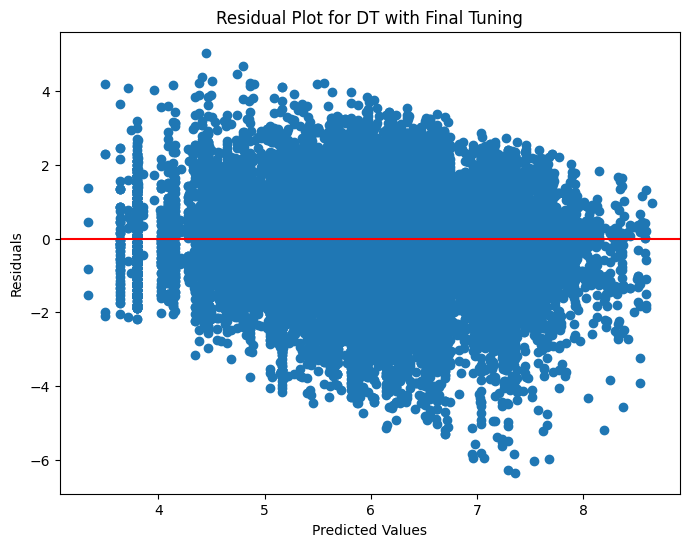

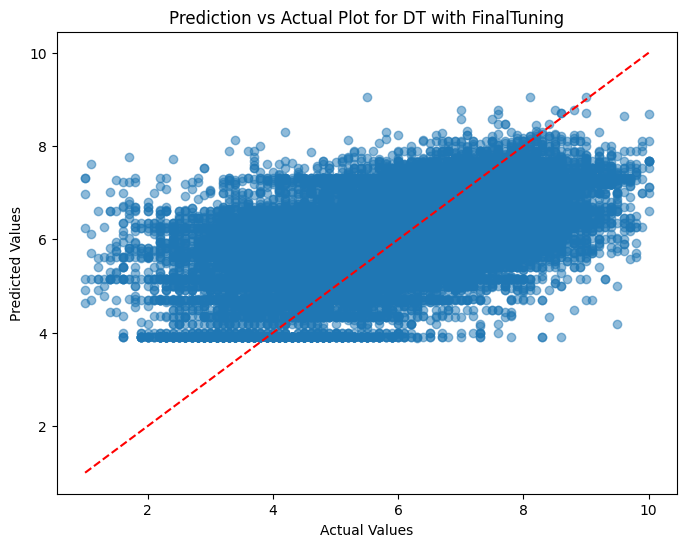

In [22]:
from sklearn.model_selection import GridSearchCV

# Setting up Grid Search for hyperparameter tuning of the Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 10, 12],  # exploring various depths 
    'min_samples_split': [2, 5, 7, 10, 13],   # minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 7, 10]      # minimum number of samples required at a leaf node
}

# Initializing the Grid Search with a Decision Tree Regressor
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=10, scoring='neg_mean_squared_error')

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
final_best_params = grid_search.best_params_
print(final_best_params)

# Training the Decision Tree Regressor with the best parameters found
final_dt_regressor = DecisionTreeRegressor(
    max_depth = final_best_params['max_depth'],
    min_samples_leaf = final_best_params['min_samples_leaf'],
    min_samples_split = final_best_params['min_samples_split'],
    random_state=42
)
final_dt_regressor.fit(X_train, y_train)

# Predicting on the test set with the tuned model
final_tuned_y_pred = final_dt_regressor.predict(X_test)

# Evaluating the tuned model
final_tuned_mse = mean_squared_error(y_test, final_tuned_y_pred)
final_tuned_r2 = r2_score(y_test, final_tuned_y_pred)

final_tuned_mse, final_tuned_r2
print("Final Tuned MSE:", final_tuned_mse)
print("Final Tuned R2:", final_tuned_r2)

# Residual Plot
residuals = y_test - final_tuned_y_pred
plt.figure(figsize=(8, 6))
plt.scatter(final_tuned_y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for DT with Final Tuning')
plt.show()

# Prediction vs Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, first_tuned_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Plot for DT with FinalTuning')
plt.show()

# Conclusion

We have trained 4 decision trees.
 - The very bare basic model with no hyperparameter tuning showed results of Base MSE: 2.457987047972108 and Base R2: -0.35853912171157964. Which is by no means good but serve as a baseline
 - The first dt with tuned hyperparameters utilized grid search to find optimal parameters for out model with {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}. The resulting metrics are First Tuned MSE: 1.2546405069697237 First Tuned R2: 0.3065552506435497, which is a significant improvement from the base model.
 - The second dt also used a grid search but over a simplified field, since the first search took longer. The parameter are: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2} with metrics of: Second Tuned MSE: 1.3114934170693198 Second Tuned R2: 0.2751324233275252. This a step back in terms of both metrics.
 - Finally, to make sure we cover all basis one more final grid search is conducted, with more options and a 10 fold cross validation instead of 5. This model took over 6 minutes to search and train. The results are: {'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 2}
Final Tuned MSE: 1.2461817878491048 Final Tuned R2: 0.31123041801451334. With this we see an improvement in both metrics in comparison to all other models. However, in the grand scheme of things, the results aren't great. This leads us to believe that the Decision Tree Regressor is not the best option for this dataset. Yet, more robust feature selection and engineering could be used to attempt to improve the model.